<a href="https://colab.research.google.com/github/NikosKats/ColabFiles/blob/CIFAR10-MODEL.ipynb/CIFAR10_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

batch_size = 128
num_epochs = 10
learning_rate = 0.001
train_acc = []
test_acc = []

In [10]:
# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=True,
                                        download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=False,
                                       download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [15]:
# Define the model
class CIFAR10Model(nn.Module):
    def __init__(self):
        super(CIFAR10Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.fc1(x)
        return x

# Create an instance of the model
model = CIFAR10Model()

In [16]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute accuracy on train dataset
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc.append(100 * correct / total)

    # Compute accuracy on test dataset
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_acc.append(100 * correct / total)
    
    # Print the current loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc[-1]:.2f}%, Test Accuracy: {test_acc[-1]:.2f}%')


Epoch [1/10], Loss: 1.3088, Train Accuracy: 58.44%, Test Accuracy: 57.36%
Epoch [2/10], Loss: 1.3035, Train Accuracy: 64.45%, Test Accuracy: 62.69%
Epoch [3/10], Loss: 1.1766, Train Accuracy: 69.41%, Test Accuracy: 67.01%
Epoch [4/10], Loss: 0.6844, Train Accuracy: 71.09%, Test Accuracy: 67.67%
Epoch [5/10], Loss: 0.8588, Train Accuracy: 75.09%, Test Accuracy: 70.32%
Epoch [6/10], Loss: 0.6194, Train Accuracy: 76.44%, Test Accuracy: 70.66%
Epoch [7/10], Loss: 0.6811, Train Accuracy: 77.61%, Test Accuracy: 70.83%
Epoch [8/10], Loss: 0.7015, Train Accuracy: 78.77%, Test Accuracy: 71.16%
Epoch [9/10], Loss: 0.6643, Train Accuracy: 80.76%, Test Accuracy: 72.12%
Epoch [10/10], Loss: 0.7413, Train Accuracy: 80.90%, Test Accuracy: 70.96%


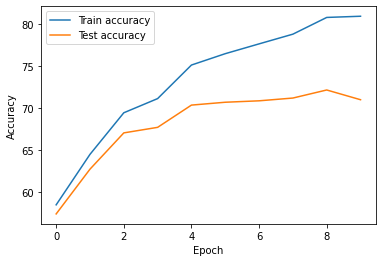

In [18]:
# Plot the train and test accuracy over time
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
